# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Matt Goeckel
https://github.com/GeckoG/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [109]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
print(response.status_code)

import pickle
with open('source.pkl', 'wb') as f:
    pickle.dump(response.text, f)

200


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [110]:
with open('source.pkl', 'rb') as f:
    article_html = pickle.load(f)

from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')
article_element = soup.find('article')
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [111]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())

#Remove spaces & punctuation & stop words
def remove_space_punct(token):
    return not (token.is_space or token.is_punct or token.is_stop)

from collections import Counter
usable_tokens = [token for token in doc if remove_space_punct(token)]
word_freq = Counter(map(str,usable_tokens))
for word, freq in word_freq.most_common(5):
    print(word + " appears " + str(freq) + " times in this article.")

laser appears 29 times in this article.
headlights appears 17 times in this article.
technology appears 10 times in this article.
headlight appears 10 times in this article.
LED appears 10 times in this article.


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [112]:
usable_lemmas = [token.lemma_.lower() for token in doc if remove_space_punct(token)]
lemma_freq = Counter(usable_lemmas)
for lemma, freq in lemma_freq.most_common(5):
    print("There are " + str(freq) + " instances of " + lemma + " in this article.")

There are 40 instances of laser in this article.
There are 28 instances of headlight in this article.
There are 12 instances of beam in this article.
There are 11 instances of led in this article.
There are 10 instances of technology in this article.


5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [113]:
# def score_sentence_by_token(sentence, interesting_token):
#     print(str(sentence).replace('\n','').replace('  ',' '))
#     count = 0
#     interesting_list = set()
#     for token in sentence:
#         if str(token) in interesting_token:
#             interesting_list.add(token)
#             count += 1
#     token_freq = Counter(map(str,interesting_list))
#     print("There are " + str(count) + " key words in this sentence.")
#     for word, num in token_freq.most_common():
#         print(word + "(" + str(num) + ") ", end='')

def score_sentence_by_token(sentence, interesting_token):
    count = 0
    total_words = 0
    for token in sentence:
        total_words += 1
        if str(token) in interesting_token:
            count += 1
    return count/total_words


sentences = list(doc.sents)

key_words = set()
for word, freq in word_freq.most_common(5):
    key_words.add(word)

score_sentence_by_token(sentences[1], key_words)

0.08695652173913043

In [114]:
# def score_sentence_by_lemma(sentence, interesting_lemmas):
#     print(str(sentence).replace('\n','').replace('  ',' '))
#     count = 0
#     interesting_list = set()
#     for token in sentence:
#         if token.lemma_.lower() in interesting_lemmas:
#             interesting_list.add(token.lemma_.lower())
#             count += 1
#     lemma_freq = Counter(map(str,interesting_list))
#     print("There are " + str(count) + " key lemmas in this sentence.")
#     for lemma, num in lemma_freq.most_common():
#         print(lemma + "(" + str(num) + ") ", end='')

def score_sentence_by_lemma(sentence, interesting_lemmas):
    count = 0
    total_words = 0
    for token in sentence:
        total_words += 1
        if token.lemma_.lower() in interesting_lemmas:
            count += 1
    return count/total_words


sentences = list(doc.sents)

key_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    key_lemmas.add(lemma)

score_sentence_by_lemma(sentences[1], key_lemmas)

0.08695652173913043

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

(array([1., 7., 7., 6., 4., 4., 1., 1., 0., 3.]),
 array([0.        , 0.02222222, 0.04444444, 0.06666667, 0.08888889,
        0.11111111, 0.13333333, 0.15555556, 0.17777778, 0.2       ,
        0.22222222]),
 <BarContainer object of 10 artists>)

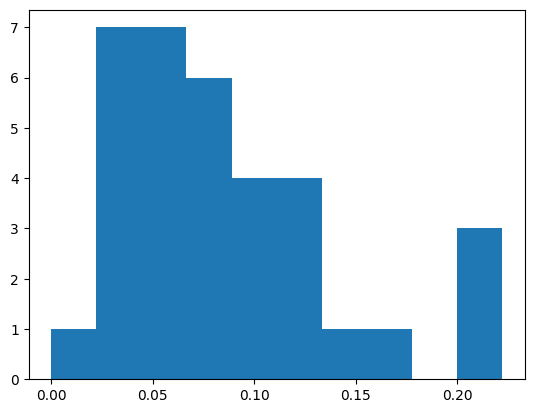

In [115]:
percentages = set()
for sentence in sentences:
    percentages.add(score_sentence_by_token(sentence, key_words))

import matplotlib.pyplot as plt
plt.hist(percentages)


In [116]:
## It appears that most of the data falls between 0.022 and 0.133 in our histogram, with it peaking at 0.022 to 0.066.

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

(array([ 2., 10.,  5.,  7.,  6.,  2.,  1.,  1.,  1.,  2.]),
 array([0.        , 0.02608696, 0.05217391, 0.07826087, 0.10434783,
        0.13043478, 0.15652174, 0.1826087 , 0.20869565, 0.23478261,
        0.26086957]),
 <BarContainer object of 10 artists>)

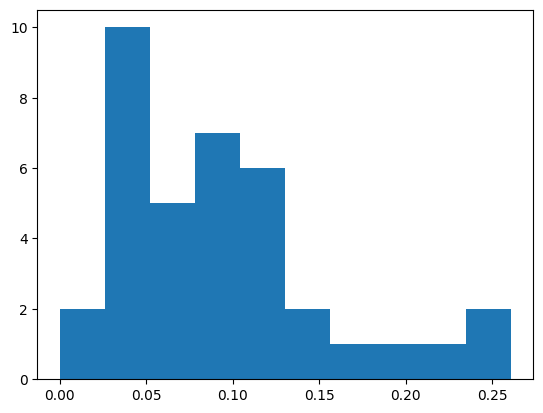

In [117]:
percentages = set()
for sentence in sentences:
    percentages.add(score_sentence_by_lemma(sentence, key_lemmas))

import matplotlib.pyplot as plt
plt.hist(percentages)

In [118]:
## It appears that most of the data falls between 0.026 and 0.130 in our histogram, with it peaking at 0.026 to 0.052.

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

spaCy is extremely powerful, and can even determine what type of word each token is within the structure of the sentence (noun, verb, etc). So, we would just need to write a couple lines of code to filter out everything except Nouns and Proper Nouns (these two are separate in spaCy so we'll want to take both). For example, instead of using our remove_space_punct() function to filter out spaces & punctuation, we would create a function that filters out EVERYTHING except nouns & proper nouns.